In [28]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("/Users/pcdsj/Downloads/Complete data/final_combined_data.csv")
column_data=df['stationCode']
#unique_value=column_data.unique
num_column_data=column_data.nunique()

print("电站总共数量：",num_column_data)

电站总共数量： 181


/var/folders/62/gx0t495n1tl_rtmwg274tbx80000gn/T/ipykernel_24602/805091482.py:3: DtypeWarning: Columns (7,16,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/Users/pcdsj/Downloads/Complete data/final_combined_data.csv")


In [10]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')  # 自动识别，错误设为 NaT
result = df.groupby('stationCode').agg(
    count=('date', 'count'),
    start_date=('date', 'min'),
    end_date=('date', 'max'),
    span_days=('date', lambda x: (x.max() - x.min()).days + 1)
).reset_index()

print(result)

result.to_csv('/Users/pcdsj/Downloads/Complete data/station_summary.csv', index=False)


     stationCode  count start_date   end_date  span_days
0        1014288    827 2022-01-01 2024-06-30      912.0
1        1015076    762 2022-01-01 2024-06-30      912.0
2        1016647    766 2022-01-01 2024-04-30      851.0
3        1019792    782 2022-01-26 2024-06-30      887.0
4        1024074    908 2022-01-01 2024-06-30      912.0
..           ...    ...        ...        ...        ...
176      1385774      0        NaT        NaT        NaN
177      1391876      0        NaT        NaT        NaN
178      1412460      0        NaT        NaT        NaN
179      1421301      0        NaT        NaT        NaN
180      1422925      0        NaT        NaT        NaN

[181 rows x 5 columns]


In [12]:
# 1. 过滤出 span_days 大于 900 的
filtered = result[result['span_days'] > 900]

# 2. 按照 count 从高到低排序
sorted_result = filtered.sort_values(by='count', ascending=False).reset_index(drop=True)

# 3. 打印结果
# 设置 Pandas 显示选项：显示所有行和列
pd.set_option('display.max_rows', None)         # 显示所有行
pd.set_option('display.max_columns', None)      # 显示所有列
pd.set_option('display.width', None)            # 自动调整列宽
pd.set_option('display.max_colwidth', None)     # 不截断列内容

# 现在打印就不会省略了
print(sorted_result)

    stationCode  count start_date   end_date  span_days
0       1123726    912 2022-01-01 2024-06-30      912.0
1       1071161    912 2022-01-01 2024-06-30      912.0
2       1046632    912 2022-01-01 2024-06-30      912.0
3       1100859    912 2022-01-01 2024-06-30      912.0
4       1100825    911 2022-01-01 2024-06-30      912.0
5       1115362    910 2022-01-01 2024-06-30      912.0
6       1070954    910 2022-01-01 2024-06-30      912.0
7       1024074    908 2022-01-01 2024-06-30      912.0
8       1095798    906 2022-01-01 2024-06-30      912.0
9       1123138    900 2022-01-01 2024-06-30      912.0
10      1053246    899 2022-01-01 2024-06-30      912.0
11      1056562    898 2022-01-01 2024-06-30      912.0
12      1046420    898 2022-01-01 2024-06-30      912.0
13      1114607    894 2022-01-01 2024-06-30      912.0
14      1090203    894 2022-01-01 2024-06-30      912.0
15      1100588    887 2022-01-01 2024-06-30      912.0
16      1092877    873 2022-01-01 2024-06-30    

In [27]:
import pandas as pd

# 1. 读取文件
station_list = pd.read_excel("/Users/pcdsj/Downloads/Complete data/未命名文件夹/Station list.xlsx",sheet_name='Sungrow')
station_summary = pd.read_csv("/Users/pcdsj/Downloads/Complete data/station_summary.csv")

# 2. 清洗 station_list 中的 Plant Code
station_list['stationCode'] = (
    station_list['Plant Code']
    .astype(str)
    .str.replace("NE=", "", regex=False)
    .astype(int)
)

# ⚠️ 关键补充：确保 station_summary 中的 stationCode 也是 int 类型
station_summary['stationCode'] = station_summary['stationCode'].astype(int)

# 3. 提取合并字段
station_info = station_list[['stationCode', 'Installed Capacity', 'State', 'Region']]

# 4. 合并
station_summary = pd.merge(station_summary, station_info, on='stationCode', how='left')

# 5. 保存结果
station_summary.to_csv("/Users/pcdsj/Downloads/Complete data/station_summary_updated.csv", index=False)

# 6. 查看未匹配到的项（可选）
missing = station_summary[station_summary['Installed Capacity'].isna()]
print("未匹配到的 stationCode：", missing['stationCode'].tolist())

未匹配到的 stationCode： [1412460]


In [25]:
print("summary 中 stationCode 示例：", station_summary['stationCode'].head())
print("list 中 stationCode 示例：", station_info['stationCode'].head())

summary 中 stationCode 示例： 0    1014288
1    1015076
2    1016647
3    1019792
4    1024074
Name: stationCode, dtype: int64
list 中 stationCode 示例： 0    51062974
1    49714001
2    49709478
3    50307647
4    52561313
Name: stationCode, dtype: int64


对station进行分析，同时选择span day大于900天，count 大于900 条，installed capacity 大于 400的电站： 1070954，1090203，1100588，1024074

/var/folders/62/gx0t495n1tl_rtmwg274tbx80000gn/T/ipykernel_24602/1538411823.py:2: DtypeWarning: Columns (7,16,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/pcdsj/Downloads/Complete data/final_combined_data.csv')  # 或者 pd.read_excel('your_data.xlsx')


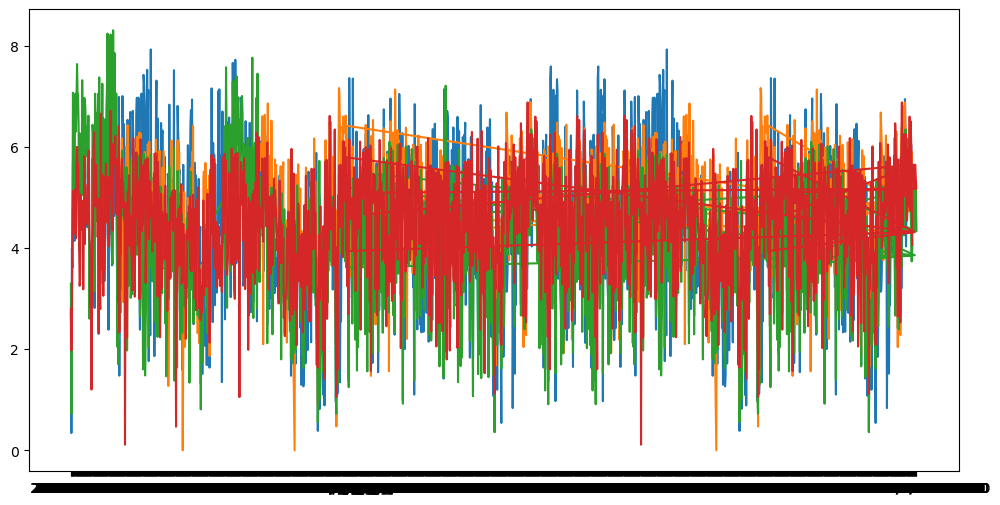

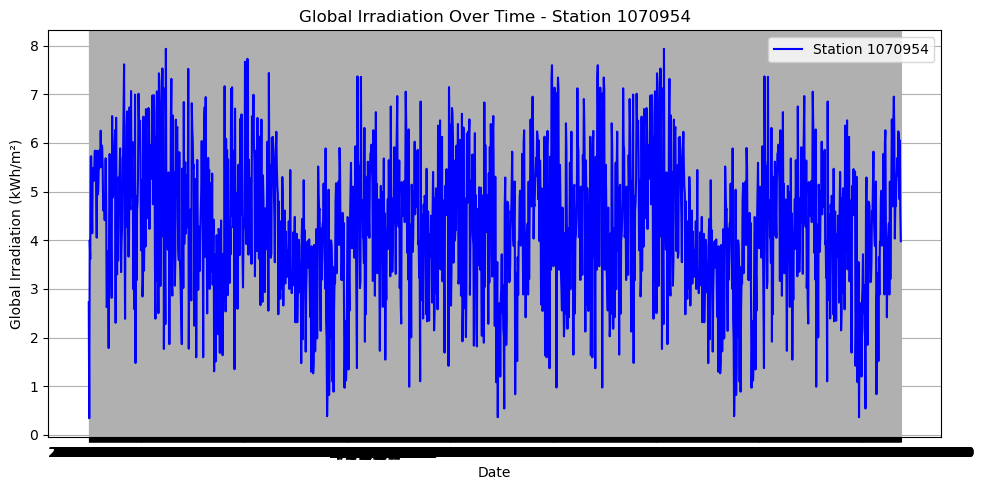

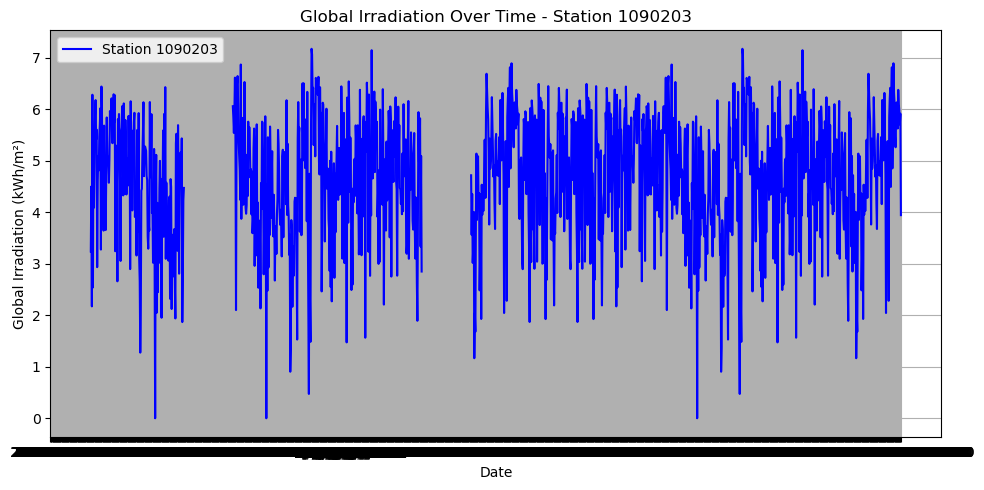

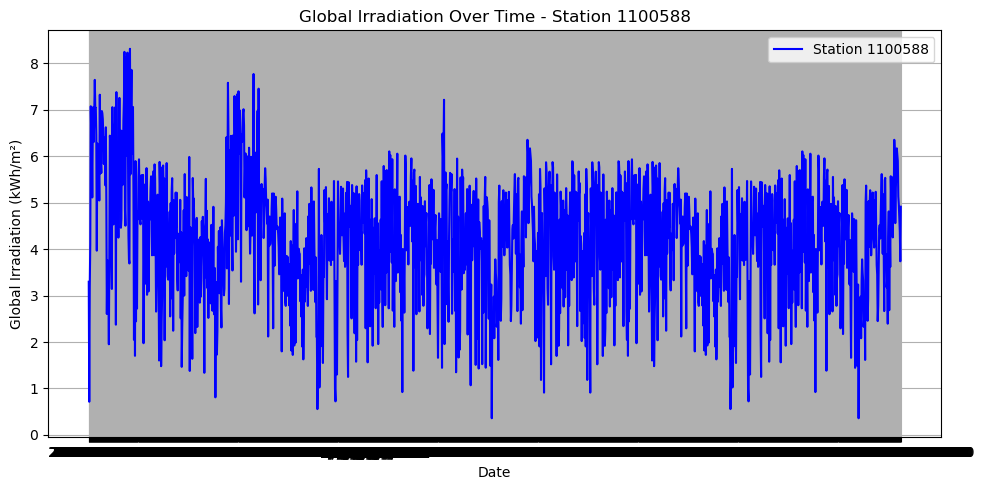

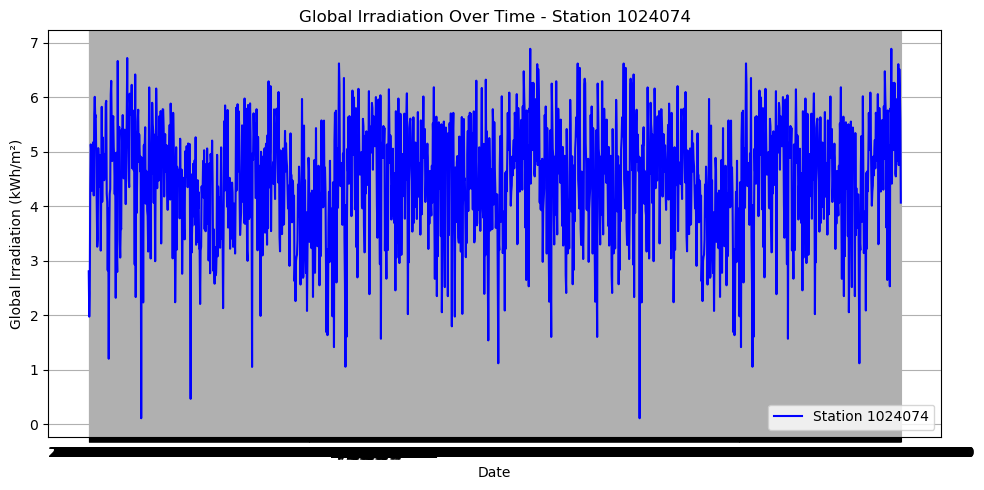

In [33]:
# 1. 读取数据（根据你的实际文件名修改）
df = pd.read_csv('/Users/pcdsj/Downloads/Complete data/final_combined_data.csv')  # 或者 pd.read_excel('your_data.xlsx')

# 2. 转换日期为 datetime 类型
#df['date'] = pd.to_datetime(df['date'])

# 3. 过滤目标电站
target_stations = [1070954, 1090203, 1100588, 1024074]
df_filtered = df[df['stationCode'].isin(target_stations)]

# 4. 按 stationCode 分组绘图
plt.figure(figsize=(12, 6))

for code in target_stations:
    station_data = df_filtered[df_filtered['stationCode'] == code]
    plt.plot(station_data['date'], station_data['global_irradiation'], label=f'Station {code}')

# 4. 每个电站单独画图
for code in target_stations:
    station_data = df_filtered[df_filtered['stationCode'] == code]
    
    # 创建图像
    plt.figure(figsize=(10, 5))
    plt.plot(station_data['date'], station_data['global_irradiation'], label=f'Station {code}', color='blue')

    # 图形美化
    plt.title(f'Global Irradiation Over Time - Station {code}')
    plt.xlabel('Date')
    plt.ylabel('Global Irradiation (kWh/m²)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()

    # 显示图表
    plt.show()

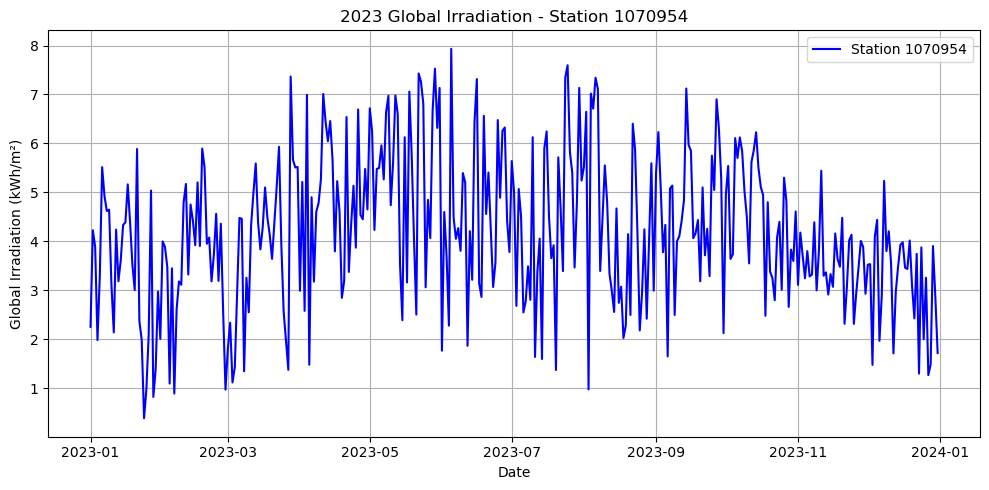

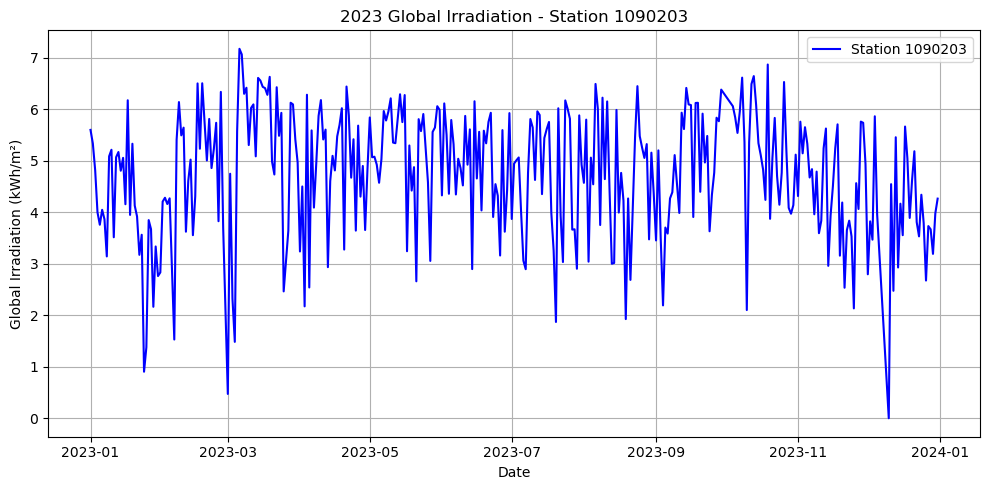

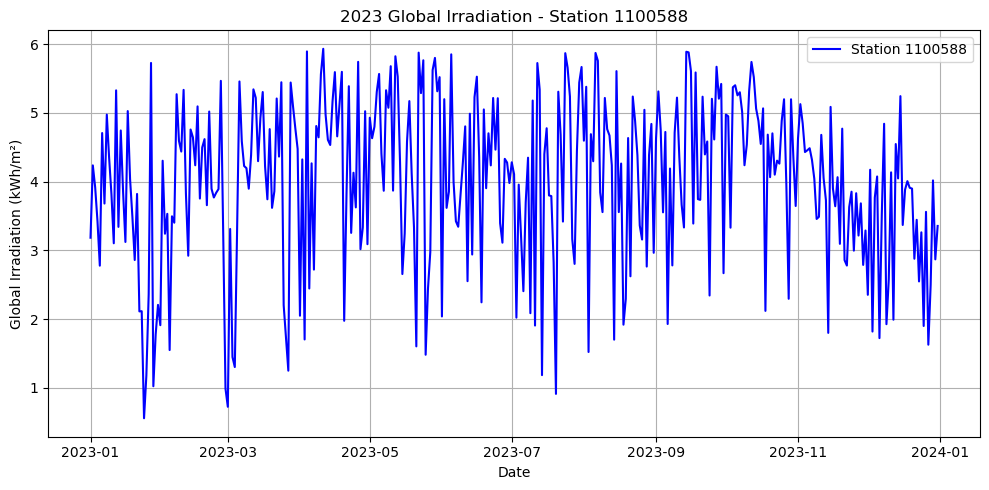

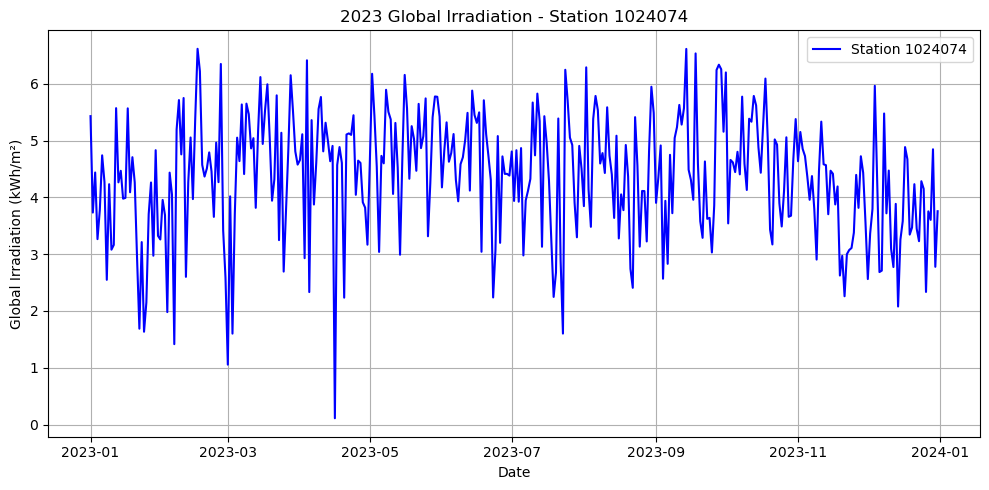

In [37]:


# 2. 解析日期，跳过错误格式
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.dropna(subset=['date'])

# 3. 筛选目标年份的数据（如 2023）
df = df[(df['date'].dt.year == 2023)]

# 4. 筛选目标电站
target_stations = [1070954, 1090203, 1100588, 1024074]
df_filtered = df[df['stationCode'].isin(target_stations)]

# 5. 每个电站单独画图
for code in target_stations:
    # 在每个电站绘图前加这一行
    
    station_data = df_filtered[df_filtered['stationCode'] == code]
    station_data = station_data.sort_values('date')  # 确保按时间顺序画线
    station_data = station_data.dropna(subset=['global_irradiation'])  # 清除缺失值
    
    plt.figure(figsize=(10, 5))
    plt.plot(station_data['date'], station_data['global_irradiation'], label=f'Station {code}', color='blue')

    plt.title(f'2023 Global Irradiation - Station {code}')
    plt.xlabel('Date')
    plt.ylabel('Global Irradiation (kWh/m²)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

Epoch 1/30


/var/folders/62/gx0t495n1tl_rtmwg274tbx80000gn/T/ipykernel_39043/2898015462.py:5: DtypeWarning: Columns (7,16,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("/Users/pcdsj/Downloads/Complete data/final_combined_data.csv")
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.1464 - val_loss: 0.0276
Epoch 2/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0355 - val_loss: 0.0299
Epoch 3/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0373 - val_loss: 0.0275
Epoch 4/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0332 - val_loss: 0.0288
Epoch 5/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0380 - val_loss: 0.0271
Epoch 6/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0350 - val_loss: 0.0272
Epoch 7/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0381 - val_loss: 0.0274
Epoch 8/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0366 - val_loss: 0.0280
Epoch 9/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0313 - val_loss: 0.0267
Epoch 10/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0349 - val_loss: 0.0272
Epoch 11/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0345 - val_loss: 0.0278
Epoch 12/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0376 - val_l

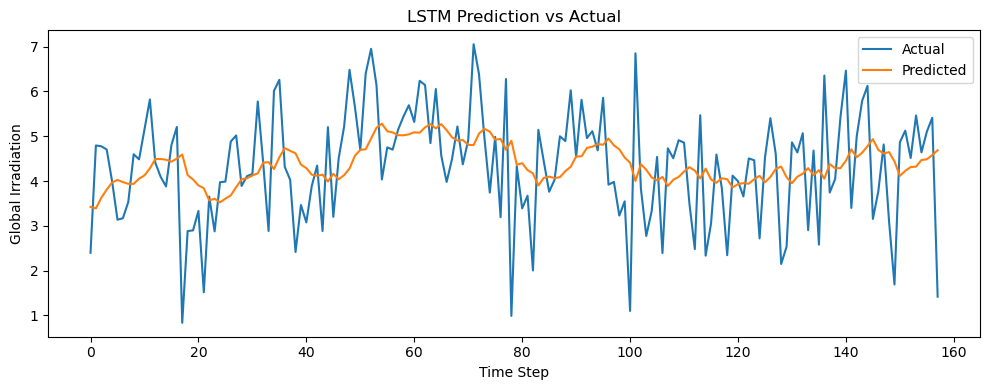

In [9]:
from lstm_model import run_lstm_pipeline
import pandas as pd
def main():
    # 读取 Excel（假设是多 sheet，所有数据合并）
    df= pd.read_csv("/Users/pcdsj/Downloads/Complete data/final_combined_data.csv")
    
    # 提取 1070954 电站数据
    df_station = df[df['stationCode'] == 1070954].copy()

    # 确保 date 列是日期类型，并清洗错误格式
    df_station['date'] = pd.to_datetime(df_station['date'], errors='coerce')

    # 删除无法解析日期的行
    df_station = df_station.dropna(subset=['date'])

    # 调用 LSTM 流程
    run_lstm_pipeline(df_station, window_size=120, lstm_units=70, epochs=30, batch_size=16)


if __name__ == "__main__":
    main()